# 1. Numpy arrays

Numpy has many different types of data "containers": lists, dictionaries, tuples etc. However none of them allows for efficient numerical calculation, in particular not in multi-dimensional cases (think e.g. of operations on images). Numpy has been developed exactly to fill this gap. It provides a new data structure, the **numpy array**, and a large library of operations that allow to: 
- generate such arrays
- modify such arrays (projection, extraction of sub-arrays etc.)
- apply mathematical operations on them

Numpy is the base of almost the entire Python scientific programming stack. Many libraries build on top of Numpy, either by providing specialized functions to operate on them (e.g. scikit-image for image processing) or by creating more complex data containers on top of it. The data science library Pandas that will also be presented in this course is a good example of this with its dataframe structures.

In [1]:
import numpy as np

In [2]:
mylist = [2,5,3,9,5,2]
mylist

[2, 5, 3, 9, 5, 2]

In [3]:
type(mylist)

list

In [4]:
myarray = np.array(mylist)
myarray

array([2, 5, 3, 9, 5, 2])

In [5]:
type(myarray)

numpy.ndarray

### Array Type
Just like when we create regular variables in Python, arrays receive a type when created. Unlike regular list, **all** elements of an array always have the same type. The type of an array can be recovered through the ```.dtype``` method:

In [6]:
myarray.dtype

dtype('int64')

In [7]:
myarray2 = np.array([1.2, 6, 7.6, 5])
myarray2, myarray2.dtype

(array([1.2, 6. , 7.6, 5. ]), dtype('float64'))

In [9]:
myarray.shape

(6,)

In [10]:
my2d_list = [[1,2,3], [4,5,6]]

my2d_array = np.array(my2d_list)
my2d_array

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
my2d_array.shape

(2, 3)

In [12]:
one_array = np.ones((2,3))
one_array

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
zero_array = np.zeros((2,3))
zero_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
zero_array[1] = [0,2,3]
zero_array

array([[0., 0., 0.],
       [0., 2., 3.]])

### Dot
**Linear Algebra Matrix Multiplication**

Let's represent that in matrix form:

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}=\begin{bmatrix} x_01 & x_1 \\ x_02 & x_2 \\ \vdots & \vdots \\ x_0n & x_n \end{bmatrix} \begin{bmatrix} w_0 & w_1 \end{bmatrix}$$

Rules:

$$y_1=(x_01⋅w_0)+(x_1⋅w_1)$$

$$y_2=(x_02⋅w_0)+(x_2⋅w_1)$$

$$\dots$$

$$y_n=(x_0n⋅w_0)+(x_n⋅w_1)$$

In [15]:
X = np.array([[1, 5], [1, 3], [1, 4]])
w = np.array([2, 3])

# Compute the dot product between 'X' and 'w'
# This calculates the predicted values for each data point as: X[0]*w[0] + X[1]*w[1]
# Result is an array where each element corresponds to the prediction for a row in X

# y1=(1⋅2)+(5⋅3)=2+15=17
# y2=(1⋅2)+(3⋅3)=2+9=11
# y3=(1⋅2)+(4⋅3)=2+12=14

y = np.dot(X, w)
y

array([17, 11, 14])

In [16]:
A = np.arange(12).reshape((3,4))
B = np.arange(4)
A,B              

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([0, 1, 2, 3]))

### <span style="color:red">Please add your comments in here</span>.

In [19]:
np.dot(A,B)
# Add your comments
# Please explain how to use np.dot to perform matrix multiplication for A and B.
# Provide a step-by-step explanation of the calculation process as above.

# The dot product of matrix A and B works as follows.
#     First, each row in matrix A gets multiplied with the corresponding value in the matrix B values and then the values are all added together to get the final value for that row in the final matrix.
#     For example for the first row, (0*0)+(1*1)+(2*2)+(3*3) = 0+1+4+9 = 14
#     For the second row, (4*0)+(5*1)+(6*2)+(7*3) = 0+5+12+21 = 38
#     For the thrid row, (8*0)+(9*1)+(10*2)+(11*3) = 0+9+20+33 = 62
#     Thus, we have the final matrix ([14, 38, 62])
    
#     To execute the dot product, the code syntax "np.dot(A, B)" is used where "np" is the numpy library and ".dot" is the dot product function. Inside that, numpy array matrices A and B are used as arguments for that dot function.


array([14, 38, 62])

In [20]:
A @ B

array([14, 38, 62])

### Dictionary 

A Python dictionary is a built-in data structure used to store data as key-value pairs. It is highly efficient for looking up, adding, and deleting data by key. Below are the rules and features that govern Python dictionaries:

In [21]:
my_dict = {1: "value", "key": 42, (2, 3): "tuple_key_value"}
# Invalid: my_dict = {[1, 2]: "value"}  # Lists cannot be keys

In [22]:
my_dict[1]

'value'

In [23]:
my_dict["key"]

42

In [24]:
my_dict[(2,3)]

'tuple_key_value'

# 2. Pandas

In [25]:
import pandas as pd
myDict = {'k1': ['one', 'two'] * 3 + ['two'],
         'k2': [1,1,2,3,3,4,4]}

myDict

{'k1': ['one', 'two', 'one', 'two', 'one', 'two', 'two'],
 'k2': [1, 1, 2, 3, 3, 4, 4]}

In [27]:
import pandas as pd
data = pd.DataFrame(myDict)
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


### Renaming Axis Indexes
#### Just like values, axis labels can also be transformed by a function or mapping to produce differntly labeled objects.
#### We can also modify axes in-place without any new data structure.

In [28]:
data = pd.DataFrame(np.arange(12).reshape((3,4)),
                   index = ['Ohio', 'Indiana', 'New York'],
                   columns = ['one', 'two', 'three', 'four'])

In [29]:
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
data

,one,two,three,four
Ohio,0,1,2,3
Indiana,4,5,6,7
New York,8,9,10,11


### Read CSV

In [36]:
df = pd.read_csv('out.csv')
df

,Name,Age,Height(in cm)
0,John,45,150
1,Sammy,38,180
2,Joe,90,160


In [37]:
df.columns

Index(['Name', 'Age', 'Height(in cm)'], dtype='object')

In [38]:
df[['Age','Height(in cm)']]

,Age,Height(in cm)
0,45,150
1,38,180
2,90,160


### Save CSV

In [42]:
df = pd.DataFrame({ 
    'Name': ['John', 'Sammy', 'Joe'], 
    'Age': [45, 38, 90], 
    'Height(in cm)': [150, 180, 160] 
}) 
df.to_csv('out.csv', index=False)


### <span style="color:red">Please add your comments in here</span>.

In [40]:
# Please Save your full name, student ID, and hometown into a csv file, name the CSV file your first name and upload it to GitHub.
df = pd.DataFrame({ 
    'Name': ['Telmen'], 
    'Student ID': [10101010], 
    'Hometown': ['Ulaanbaatar'] 
}) 
df.to_csv('Telmen.csv', index=False)

# 3. Visualization
### Pandas Visualization

<Axes: xlabel='Name'>

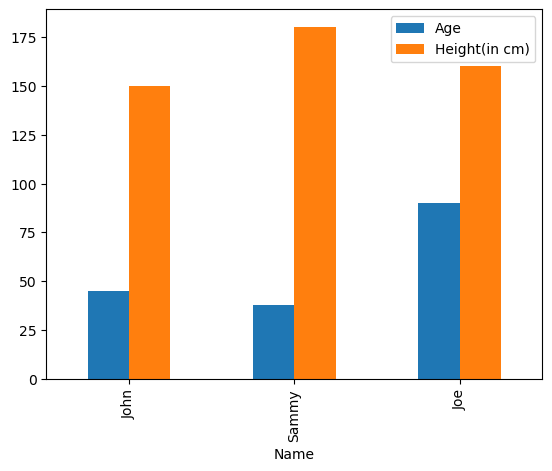

In [43]:
df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar") 

<Axes: xlabel='Name'>

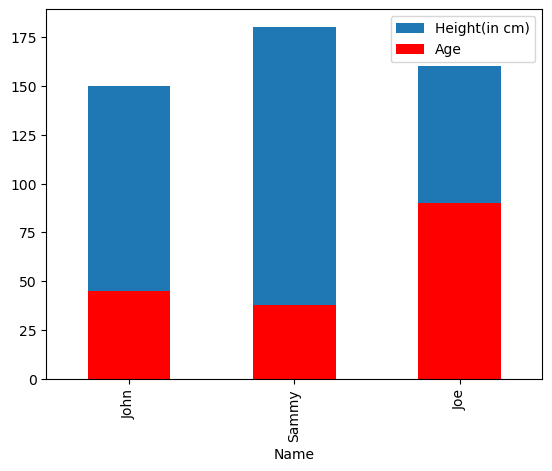

In [44]:
# plotting Height 
ax = df.plot(x="Name", y="Height(in cm)", kind="bar") 
# plotting age on the same axis 
df.plot(x="Name", y="Age", kind="bar",ax=ax, color="red") 

### matplotlib.pyplot Visualization

In [45]:
import matplotlib.pyplot as plt

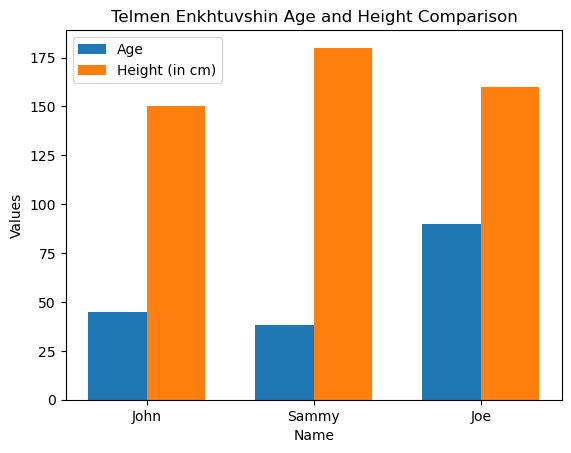

In [51]:
names = ['John', 'Sammy', 'Joe']
ages = [45, 38, 90]
heights = [150, 180, 160] 

# X positions for bars
x = np.arange(len(names))
width = 0.35  # Width of the bars

# Plotting the bars
fig, ax = plt.subplots()
ax.bar(x - width/2, ages, width, label='Age')
ax.bar(x + width/2, heights, width, label='Height (in cm)')

# Adding labels and title
ax.set_xlabel('Name')
ax.set_ylabel('Values')
ax.set_title('Telmen Enkhtuvshin Age and Height Comparison')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend(loc=2)

plt.show()

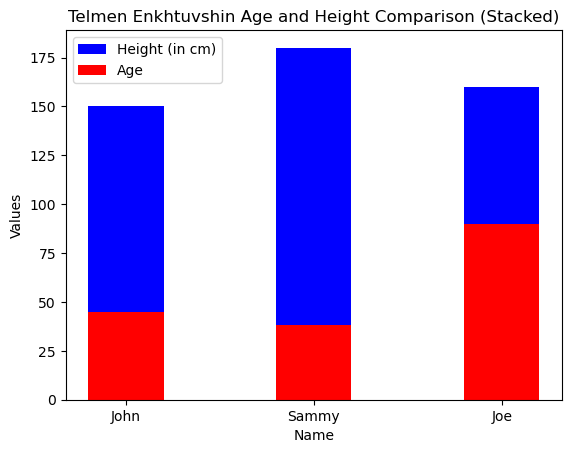

(array([0, 1, 2]), dtype('int64'))

In [53]:
names = ['John', 'Sammy', 'Joe']
ages = [45, 38, 90]
heights = [150, 180, 160] 

# X positions for bars
x = np.arange(len(names))

# Plotting the stacked bars
fig, ax = plt.subplots()

ax.bar(x, heights,width=0.4, label='Height (in cm)', color='blue')
ax.bar(x, ages,width=0.4,  label='Age', color='red') #bottom=heights, 


# Adding labels and title
ax.set_xlabel('Name')
ax.set_ylabel('Values')
ax.set_title('Telmen Enkhtuvshin Age and Height Comparison (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend(loc=2)

plt.show()
x, x.dtype

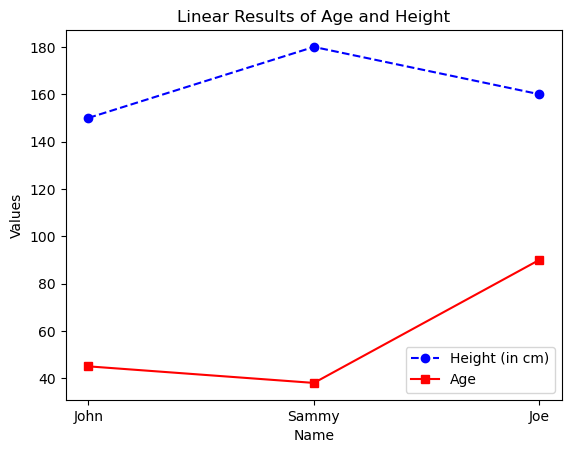

In [54]:
# Convert names to numerical values for plotting
x = np.arange(len(names))

# Plotting linear results
fig, ax = plt.subplots()
ax.plot(x, heights, marker='o', label='Height (in cm)', color='blue', linestyle='--')
ax.plot(x, ages, marker='s', label='Age', color='red', linestyle='-')

# Adding labels and title
ax.set_xlabel('Name')
ax.set_ylabel('Values')
ax.set_title('Linear Results of Age and Height')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.show()